# hotel-id-2021-fgvc8

In [1]:
import os
import sys
import fastai
import numpy as np 


from fastai.imports import *
from fastai.vision import *
from fastai.vision.all import *
from torchvision.models import vgg16_bn
from tqdm import tqdm
from sklearn import preprocessing

In [2]:
## Defining Directories
work_dir = Path('/kaggle/working/')
path = Path('../input/hotel-id-2021-fgvc8')

sample_sub = path / 'sample_submission.csv'
labels = path / 'train.csv'

In [3]:
## Reading csv
train_data = pd.read_csv(labels)
df_sample = pd.read_csv(sample_sub)


In [4]:
train_data.head(5)

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


In [5]:
train_data['image_path']= train_data['chain'].astype(str)  + '/' + train_data['image'].astype(str)
train_data[:3]

,image,chain,hotel_id,timestamp,image_path
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,85/8000d59f6a3d765f.jpg
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,6/8000febe81817f7f.jpg
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,3/80053befc2d42fba.jpg


In [6]:
len_data = len(train_data.value_counts())

print("data Length:", len_data)
print("Hotel Chains:",train_data['chain'].unique())
chain_len = len(train_data['chain'].unique())-1
chain_len

data Length: 97556
Hotel Chains: [85  6  3  5  0 82  2 87 90 28 78 89 52 50 83  9 42  8 68 71  4 80 73 55
 66 54  1 76  7 51 40 35 69 45 79 37 64 81 62 75 86 44 63 70 49 61 74 84
 88 67 59 29 32 31 22 20 72 11 34 39 38 41 57 46 65 53 16 60 47 77 30 21
 26 27 10 91 23 24 17 58 48 56 36 33 12 25 13 18]


87

## Hotels per Chain

Text(0.5, 1.0, 'Hotels per Chain')

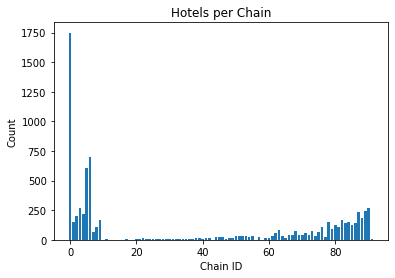

In [7]:
hotel_per_chain={}
chains = train_data['chain'].unique()
for chain_id in chains:
    hotel_per_chain[chain_id] = train_data[train_data['chain']==chain_id]['hotel_id'].nunique()

bar = plt.bar(x=hotel_per_chain.keys(),height=hotel_per_chain.values())
plt.xlabel("Chain ID")
plt.ylabel("Count")
plt.title("Hotels per Chain")

## Images per Hotel

Text(0.5, 1.0, 'Hotels and their image count')

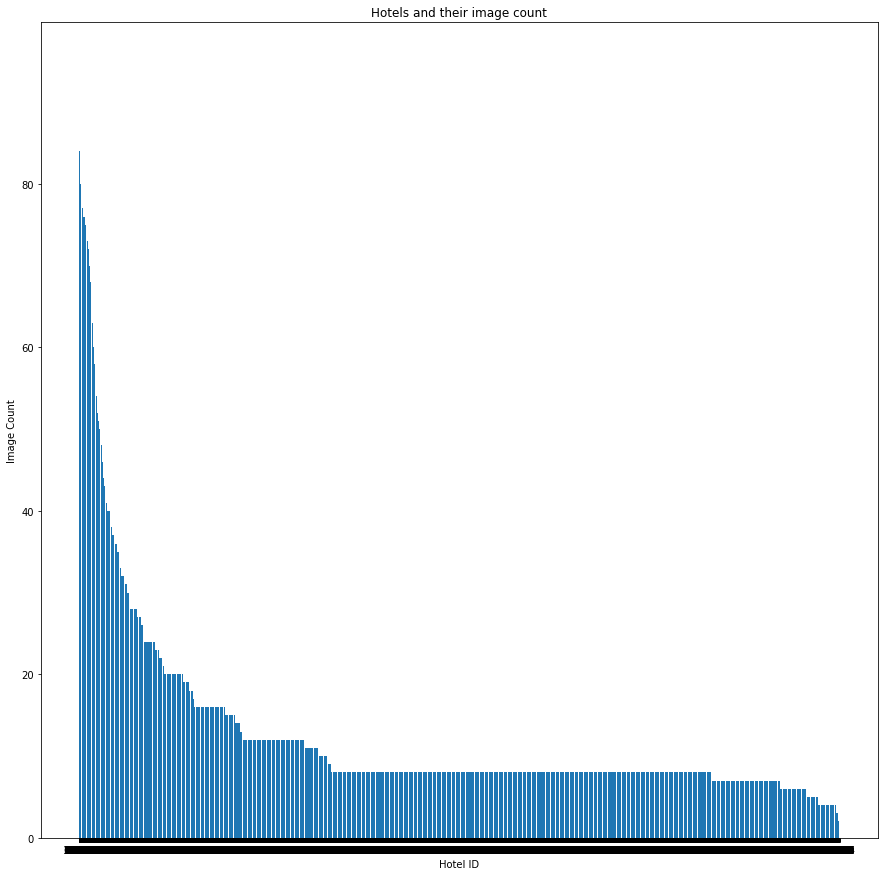

In [8]:
image_per_hotel=[]
hotels_id = train_data['hotel_id'].unique()
for hotel_id in hotels_id:
    image_per_hotel.append(train_data[train_data['hotel_id']==hotel_id]['image'].nunique())

    
hotel_image_df = pd.DataFrame({"hotel_id":map(str,hotels_id),"image_count":image_per_hotel})
hotel_image_df.sort_values(by="image_count",ascending=False,inplace=True)  

plt.figure(figsize=[15,15])

plt.bar(x=hotel_image_df["hotel_id"],height=hotel_image_df["image_count"])
plt.xlabel("Hotel ID")
# 
plt.ylabel("Image Count")
plt.title("Hotels and their image count")

## Dataset samples


In [9]:
train_dir = '../input/hotel-id-2021-fgvc8/train_images'
dataset = ImageDataLoaders.from_df(df = train_data[['image_path', 'chain']],
                                   path = train_dir,
                                   folder = '.',
                                   item_tfms=Resize(128, method='pad', pad_mode='reflection'),
                                   valid_pct=0.2,
                                   bs=32)

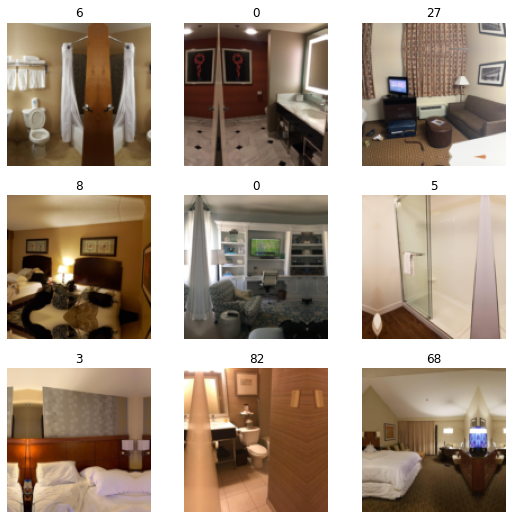

In [10]:
dataset.show_batch()